In [1]:
from datasets.BatchGenerator import BatchGenerator
from tqdm import tqdm
import numpy as np

In [2]:
random_seed = 42

In [3]:
global_times = []
global_speeds = []
names = []

In [4]:
batch_size = 15000
test_split = 0.2
validation_split = 0.2
batch_generator = BatchGenerator("datasets/test.csv", batch_size, test_split, validation_split, random_seed )

lines offset reading: 684001it [00:00, 1613230.68it/s]


In [5]:
times = []
speeds = []
name = str(batch_size) + ' seek'
for features, infos in tqdm(batch_generator.getTrainBatches(batch_size)):
    times.append(infos['loading_time'])
    speeds.append(infos['n_features']/infos['loading_time'])
global_times.append(list(times))
global_speeds.append(list(speeds))
names.append(name)

30it [00:50,  1.67s/it]


In [6]:
times = []
speeds = []
name = str(batch_size) + ' read'
for features, infos in tqdm(batch_generator.getBatches()):
    times.append(infos['loading_time'])
    speeds.append(infos['n_features']/infos['loading_time'])
global_times.append(list(times))
global_speeds.append(list(speeds))
names.append(name)

46it [01:04,  1.40s/it]


In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


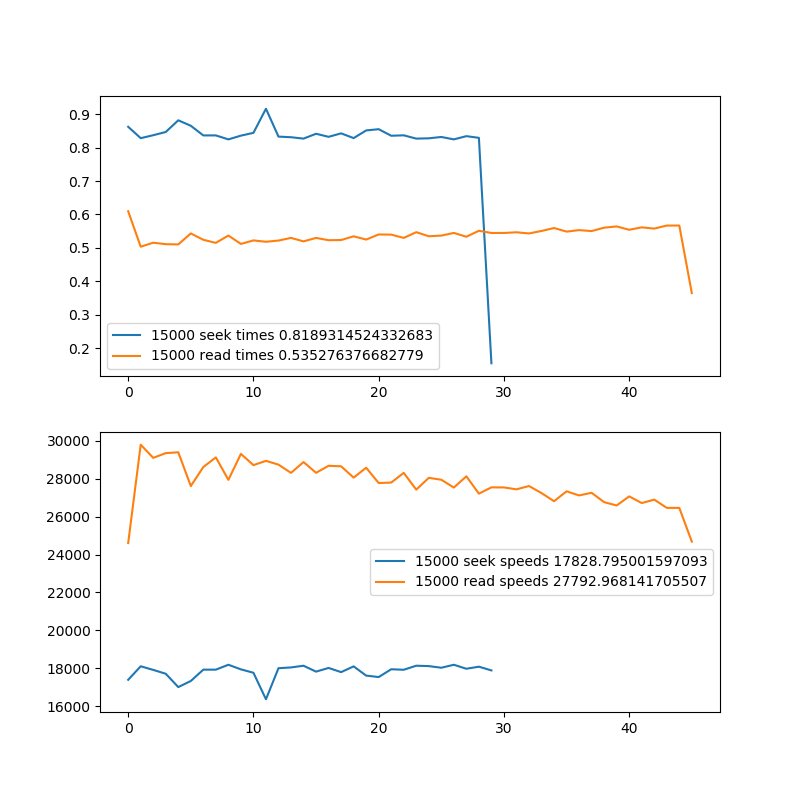

In [8]:
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

for name, times, speeds in zip(names, global_times, global_speeds):
    ax1.plot(times, label = name + ' times ' + str(np.mean(times)))
    ax2.plot(speeds, label = name + ' speeds ' + str(np.mean(speeds)))

ax1.legend()
ax2.legend()
plt.show()